In [ ]:
import pandas as pd

df = pd.read_csv('/content/Health_insurance (1).csv')

In [ ]:
df.shape



(1177, 12)

In [ ]:
df.head()


,pid,age,sex,bmi,children,smoker,region,diabetes,heart rate,Creatinine,glucose,charges
0,1,19,female,27.900,0,yes,southwest,1,68.837838,1.958333,114.636364,16884.92400
1,2,18,male,33.770,1,no,southeast,0,101.370370,1.122222,147.500000,NaN
2,3,28,male,33.000,3,no,southeast,0,72.318182,1.871429,149.000000,4449.46200
3,4,33,male,22.705,0,no,northwest,0,94.500000,0.585714,128.250000,21984.47061
4,5,32,NaN,28.880,0,no,northwest,0,67.920000,1.950000,145.750000,3866.85520


In [ ]:
df=df.drop_duplicates(subset=['pid'])



In [ ]:
df


,pid,age,sex,bmi,children,smoker,region,diabetes,heart rate,Creatinine,glucose,charges
0,1,19,female,27.900,0,yes,southwest,1,68.837838,1.958333,114.636364,16884.92400
1,2,18,male,33.770,1,no,southeast,0,101.370370,1.122222,147.500000,NaN
2,3,28,male,33.000,3,no,southeast,0,72.318182,1.871429,149.000000,4449.46200
3,4,33,male,22.705,0,no,northwest,0,94.500000,0.585714,128.250000,21984.47061
4,5,32,NaN,28.880,0,no,northwest,0,67.920000,1.950000,145.750000,3866.85520
...,...,...,...,...,...,...,...,...,...,...,...,...
1172,1173,56,female,41.910,0,no,southeast,1,100.125000,8.385714,120.000000,11093.62290
1173,1174,38,male,29.260,2,no,northwest,1,114.640000,1.900000,138.333333,6457.84340
1174,1175,29,male,32.110,2,no,northwest,1,52.720000,2.728571,99.000000,4433.91590
1175,1176,22,female,27.100,0,no,southwest,1,93.400000,1.736364,135.166667,2154.36100


In [ ]:
import numpy as np


In [ ]:
#assessing 'df' is your dataframe and contains numeric columns you want to process
def remove_outliers_iqr(df, columns):

    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns]. quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[columns] >= lower_bound) & (df[columns] <= upper_bound)]
    return df_filtered


In [ ]:
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
 df = remove_outliers_iqr(df, col)


In [ ]:
#check missing values in all column
df.isnull().sum()


,0
pid,0
age,0
sex,1
bmi,0
children,0
smoker,0
region,0
diabetes,0
heart rate,0
Creatinine,0


In [ ]:
# drop rows having NA values in charges column
df=df.dropna(subset=['charges'])



In [ ]:
df.columns




Index(['pid', 'age', 'sex', 'bmi', 'children', 'smoker', 'region', 'diabetes',
       'heart rate', 'Creatinine', 'glucose', 'charges'],
      dtype='object')

In [ ]:
#create a list of columns to fill NA values
columns_to_fill = ['bmi','heart rate','glucose'] #Example columns,replace with your actual columns



In [ ]:
#Fill NA values in specified columns with the mean of each column
for col in columns_to_fill:
  df[col]=df[col].fillna(df[col].mean())


In [ ]:
#replace'Female' with female in sex column
#dict1={'Female':'female','mal':'male'}
#df['sex']=df['sex'].replace(dict1)
#calculate mode of column
mode_value=df['sex'].mode()[0]
#replace  NaN values with mode#
df['sex'].fillna(mode_value,inplace=True)



/tmp/ipython-input-864869156.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sex'].fillna(mode_value,inplace=True)


In [ ]:
category_cols = df.select_dtypes(include='object').columns

for col in category_cols:
  print(df[col].unique())


['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [ ]:
# one hot encode the gender column data
df = pd.get_dummies(df,columns=['sex','smoker','region'])

df.head()


,pid,age,bmi,children,diabetes,heart rate,Creatinine,glucose,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1,19,27.900,0,1,68.837838,1.958333,114.636364,16884.92400,True,False,False,True,False,False,False,True
2,3,28,33.000,3,0,72.318182,1.871429,149.000000,4449.46200,False,True,True,False,False,False,True,False
3,4,33,22.705,0,0,94.500000,0.585714,128.250000,21984.47061,False,True,True,False,False,True,False,False
4,5,32,28.880,0,0,67.920000,1.950000,145.750000,3866.85520,False,True,True,False,False,True,False,False
5,6,31,25.740,0,0,74.181818,1.612500,98.333333,3756.62160,True,False,True,False,False,False,True,False


In [ ]:
#normalize numerical columns
#store min-max values for later use
min_max_values={}


In [ ]:
cols = ['age','bmi','heart rate','Creatinine','glucose']
for i in cols:
  min_val = df[i].min()
  max_val = df[i].max()
  df[i] = (df[i]-df[i].min())/(df[i].max()-df[i].min())
  min_max_values[i] = (min_val,max_val)

min_max_values


{'age': (18, 64),
 'bmi': (15.96, 47.52),
 'heart rate': (39.32142857, 129.125),
 'Creatinine': (0.266666667, 3.311111111),
 'glucose': (69.1, 252.0)}

In [ ]:
# save the JSON file

import json
with open('min_max_values.json','w') as json_files:
  json.dump(min_max_values,json_files)

df.corr()


,pid,age,bmi,children,diabetes,heart rate,Creatinine,glucose,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
pid,1.000000,0.020475,-0.003511,0.014026,0.047045,0.064814,0.040316,0.052704,0.023309,-0.036572,0.036572,0.005622,-0.005622,0.014203,0.016058,-0.042186,0.012234
age,0.020475,1.000000,0.129860,0.028331,0.098091,-0.028978,0.027501,0.056262,0.405246,0.048346,-0.048346,0.082533,-0.082533,-0.002207,0.002779,-0.016891,0.016366
bmi,-0.003511,0.129860,1.000000,-0.002198,-0.035384,-0.053729,0.062161,-0.010598,-0.065636,-0.025650,0.025650,0.263388,-0.263388,-0.116904,-0.122601,0.240479,-0.003067
children,0.014026,0.028331,-0.002198,1.000000,-0.021114,-0.046365,0.029730,0.007067,0.055658,0.011317,-0.011317,-0.005000,0.005000,-0.016229,0.014552,-0.013171,0.014714
diabetes,0.047045,0.098091,-0.035384,-0.021114,1.000000,-0.142411,0.142499,0.319982,0.023603,0.004387,-0.004387,0.008049,-0.008049,0.026009,0.009529,-0.010164,-0.025072
heart rate,0.064814,-0.028978,-0.053729,-0.046365,-0.142411,1.000000,-0.195500,-0.024848,-0.003080,0.015473,-0.015473,-0.035912,0.035912,0.039870,-0.077237,0.068231,-0.030631
Creatinine,0.040316,0.027501,0.062161,0.029730,0.142499,-0.195500,1.000000,0.043254,0.054792,-0.010179,0.010179,0.021797,-0.021797,-0.037394,-0.018781,0.061877,-0.006335
glucose,0.052704,0.056262,-0.010598,0.007067,0.319982,-0.024848,0.043254,1.000000,-0.007643,-0.073815,0.073815,0.058342,-0.058342,0.019260,-0.004513,-0.004741,-0.009778
charges,0.023309,0.405246,-0.065636,0.055658,0.023603,-0.003080,0.054792,-0.007643,1.000000,0.023153,-0.023153,-0.598446,0.598446,0.074291,0.023936,-0.033311,-0.064027
sex_female,-0.036572,0.048346,-0.025650,0.011317,0.004387,0.015473,-0.010179,-0.073815,0.023153,1.000000,-1.000000,0.021720,-0.021720,-0.017477,0.008297,0.008301,0.000648


In [ ]:
#prompt: seaborn correlation matrixx

import seaborn as sns
import matplotlib.pyplot as plt


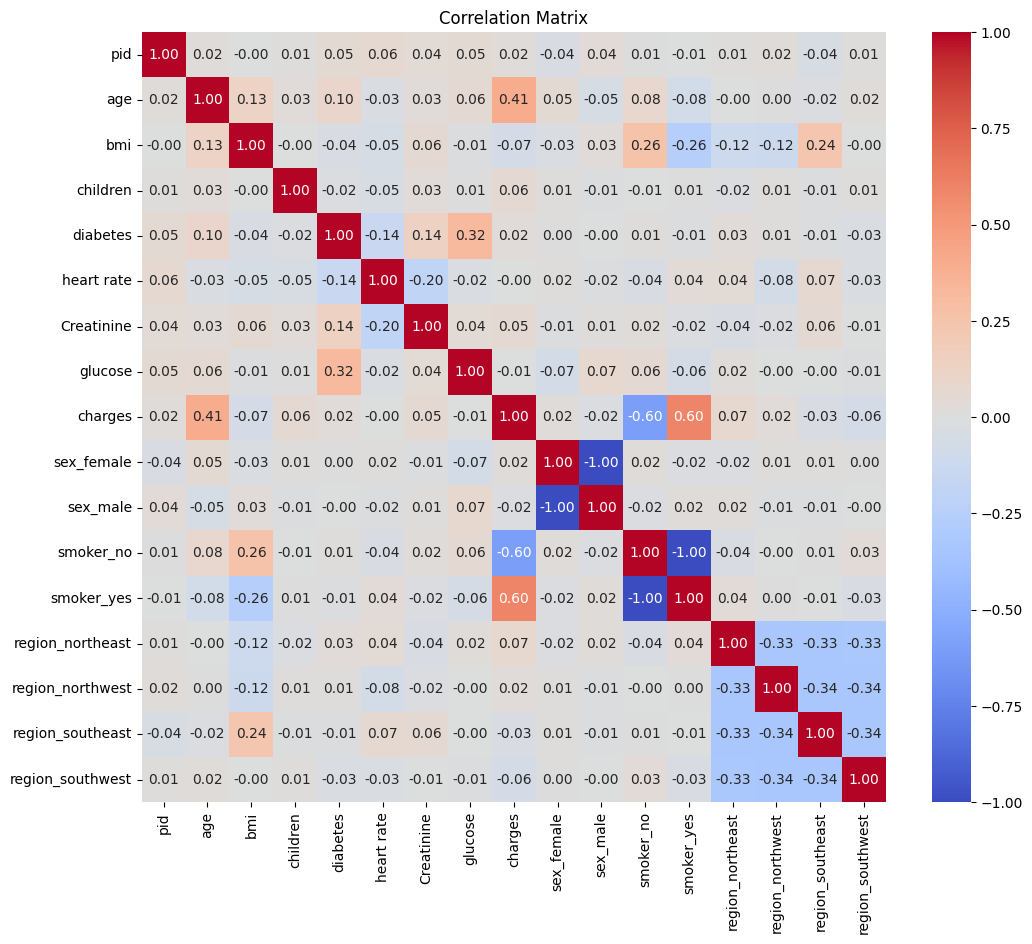

In [ ]:
#assuming "df" as your Dataframe

plt.figure(figsize=(12,10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Train test split

# seperate the features and target variable
x= df.drop(columns=['charges','pid','sex_male','smoker_yes'], axis=1)
y = df['charges']



In [ ]:
#seperate the data into train and test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)





In [ ]:
# Linear Regression model to predict the outcome

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)


LinearRegression()

In [ ]:
# predict the target variables for the test set
y_pred = reg.predict(x_test)



In [ ]:
# compute the rmse, r2 score

import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("RMSE:", rmse)
print("R2 Score:", r2)


RMSE: 4905.808013732796
R2 Score: 0.5255632765872602


In [ ]:
pd.DataFrame(x.columns,reg.coef_)


,0
11027.830455,age
2231.640089,bmi
293.794626,children
-220.818740,diabetes
-864.882220,heart rate
2685.968400,Creatinine
-199.906804,glucose
265.751726,sex_female
-15455.054390,smoker_no
792.282164,region_northeast


In [ ]:
x_test_sample = x_test.iloc[0,:]
x_test_sample_reshaped = np.array(x_test_sample).reshape(1,-1)


In [ ]:
y_pred_sample = reg.predict(x_test_sample_reshaped)

y_pred_sample

import joblib
joblib.dump(reg, 'linear_regression_model.pkl')

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


['linear_regression_model.pkl']

In [ ]:
!pip install streamlit pyngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 61.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 94.5 MB/s eta 0:00:00


In [ ]:
streamlit_code = """
import streamlit as st
import joblib
import numpy as np
import json

#load the trained model
model = joblib.load('linear_regression_model.pkl')

#streamlit app
st.title('Health Insurance Charges Prediction')
st.write('Enter the input values for prediction.')

# Input fields for each user

age = st.number_input('Age', min_value=18, max_value=65, step=1,value=30)
bmi = st.number_input('BMI', min_value=15.0, max_value=50.0, step=0.1,value=25.0)
heart_rate = st.number_input('Heart Rate', min_value=50, max_value=120, step=1,value=75)
glucose = st.number_input('Glucose', min_value=50.0, max_value=300.0, step=0.1,value=100.0)
children = st.number_input('number of children',min_value=0,max_value=10,step=1,value=0)
diabetes = st.selectbox("Has diabetes?",options=['Yes','No'])
creatinine = st.number_input('Creatinine', min_value=0.0, max_value=2.0,step=0.1,value=1.0)

#categorical features
sex_female = st.selectbox("Sex",options=["Male","Female"])== "Female"
smoker_no = st.selectbox("Smoker?",options=["Yes","No"])== "No"

#Region selection
region = st.selectbox("Region",options=["Northeast","Northwest","Southeast","Southwest"])
region_northeast = region == "Northeast"
region_northwest = region == "Northwest"
region_southeast = region == "Southeast"
region_southwest = region == "Southwest"

#Normalisation function
def min_max_scale(value, min_val, max_val):
    return (value - min_val) / (max_val - min_val)

#Load Min_Max values from JSON
with open('min_max_values.json', 'r') as json_file:
    min_max_values = json.load(json_file)

#Normalise inputs
age_norm = min_max_scale(age,*min_max_values['age'])
bmi_norm = min_max_scale(bmi,*min_max_values['bmi'])
heart_rate_norm = min_max_scale(heart_rate,*min_max_values['heart rate'])
glucose_norm = min_max_scale(glucose,*min_max_values['glucose'])
creatinine_norm = min_max_scale(creatinine,*min_max_values['Creatinine'])

# Prepare input data for prediction
input_data = np.array([
  age_norm,bmi_norm,children,int(diabetes=='Yes'),heart_rate_norm,creatinine_norm,glucose_norm,int(sex_female),int(smoker_no),int(region_northeast),int(region_northwest),int(region_southeast),int(region_southwest)
]).reshape(1,-1)

# Predict button
if st.button("Predict changes"):
  prediction = model.predict(input_data)
  st.success(f"Predict Insurance Charges: ${prediction[0]:,.2f}")

"""



In [ ]:
# save the code to a file
with open("app.py","w") as f:
  f.write(streamlit_code)

In [ ]:
!streamlit run app.py &>/content/logs.txt &

In [ ]:
from pyngrok import ngrok
ngrok.set_auth_token("31u5DoNur3xy3z6bhmvLECLS0e4_f9ZLxGaphW6hyWcy2cX3")

In [ ]:
from pyngrok import ngrok

# expose the streamlit server running on port 8501
public_url = ngrok.connect(8501)
print(f'Streamlit App is live at: {public_url}')

Streamlit App is live at: NgrokTunnel: "https://51472aa6af9d.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
#Kill all existing ngrok processes
!pkill -f ngrok